# Notebook for BBox Visualization with gluonCV tool, needs to be under mxnet kernel

In [1]:
def visualization_image_with_box(image_path, bboxes, show_order, save_img):
    image = mx.image.imread(image_path).asnumpy()
    image_name = '_'.join(image_path.split('/')[4:])
    plt.figure(figsize=(60,60))
    ax1 = plt.subplot(1, 2, 1)
    # title_font_size = 10
    # label_font_size = 6
    # color = 'darkorange'
    if show_order:
        gluoncv.utils.viz.plot_bbox(image, bboxes, labels=np.arange(len(bboxes)), ax=ax1)
    else:
        gluoncv.utils.viz.plot_bbox(image, bboxes, ax=ax1)
    if save_img:
        plt.savefig('output/{}'.format(image_name))

In [4]:
!pip install gluoncv

     |████████████████████████████████| 1.1 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 950 kB 73.4 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /home/ec2-user/anaconda3/envs/mxnet_latest_p37/bin/python3.7 /home/ec2-user/anaconda3/envs/mxnet_latest_p37/lib/python3.7/site-packages/pip install --ignore-installed --no-user --prefix /tmp/pip-build-env-_fv9ykxj/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel oldest-supported-numpy Cython
       cwd: None
  Complete output (42 lines):


INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of autocfg to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of gluoncv to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 1.1 MB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 75.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 49.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 51.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 53.4 MB/s eta 0:00:01
     |████████████████████████████████| 997 kB 52.5 MB/s eta 0:

In [5]:
import mxnet as mx
import gluoncv
import pandas as pd
import numpy as np
import os

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [7]:
def compare_before_and_after_post_processing(img_key, raw_img_dir, 
                                             bbox_raw_dir, bbox_post_dir,visual_save_dir,
                                             img_format,save_img=False,show_batch=True):
    plt.figure(figsize=(20,20))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    image_path = input_dir + image_key + img_format
    image = mx.image.imread(image_path).asnumpy()
    #bbox_raw = pd.read_csv( bbox_raw_dir + image_key.split(".")[0] + '.csv', header=None)
    bbox_raw = pd.read_csv( bbox_raw_dir + image_key + '.csv', header=None)
    bbox_raw_np = bbox_raw.to_numpy()
    bbox_post = pd.read_csv( bbox_dir + image_key + '.csv', header=None)
    bbox_post_np = bbox_post.to_numpy()

    gluoncv.utils.viz.plot_bbox(image, bbox_raw_np, labels=np.arange(len(bbox_raw_np)), ax=ax1)
    gluoncv.utils.viz.plot_bbox(image, bbox_post_np, labels=np.arange(len(bbox_post_np)), ax=ax2)
    ax1.title.set_text('Raw BBox')
    ax2.title.set_text('Processed BBox')
    #plt.show() #turn this on will destruct image save
    #plt.draw()
    #plt.pause(0.0001)
    #plt.clf()
    #fig.canvas.draw()
    #fig.canvas.flush_events()
    if save_img:
        if not os.path.exists(visual_save_dir):
            os.mkdir(visual_save_dir)
        plt.savefig(visual_save_dir+'/{}'.format(img_key))
    if show_batch: #if processing multiple figures at one time
        plt.close()

In [12]:
# raw data downloaded from the S3
input_dir = 'demo_image/'
bbox_raw_dir = 'output/bbox_raw/'
bbox_dir = 'output/bbox/'
visual_save_dir = 'output/visualization/'

# layover visual

In [21]:
image_key = '007759480'

<Figure size 1440x1440 with 0 Axes>

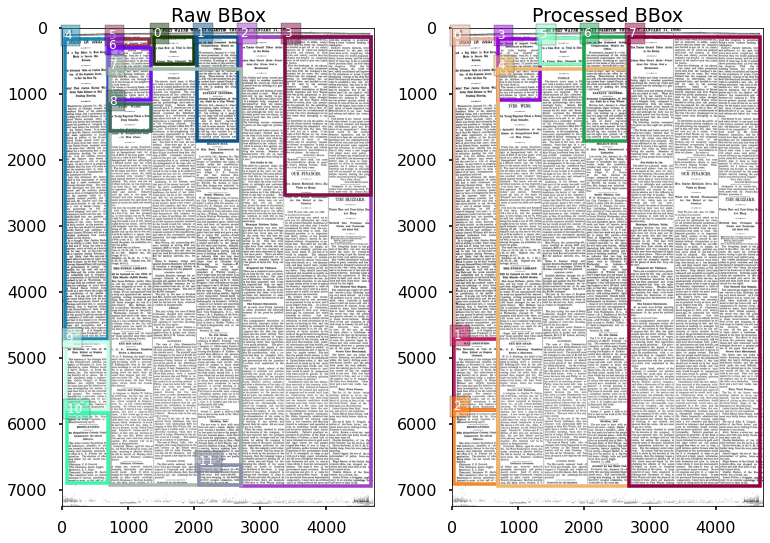

In [22]:
compare_before_and_after_post_processing(image_key, input_dir, 
                                         bbox_raw_dir, bbox_dir, visual_save_dir,
                                         '.png', save_img=True, show_batch=False)